### 11 micron radiance for Vancouver


In [1]:
from e582utils.data_read import download
import numpy as np
import h5py
import sys
import warnings
from matplotlib import pyplot as plt
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from e582lib.radiation import planckInvert
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
myd02file="MYD021KM.A2016224.2100.006.2016225153002.h5"
download(myd02file)

5.670366816083269e-08

MYD021KM.A2016224.2100.006.2016225153002.h5 already exists
and is 159039295 bytes
will not overwrite



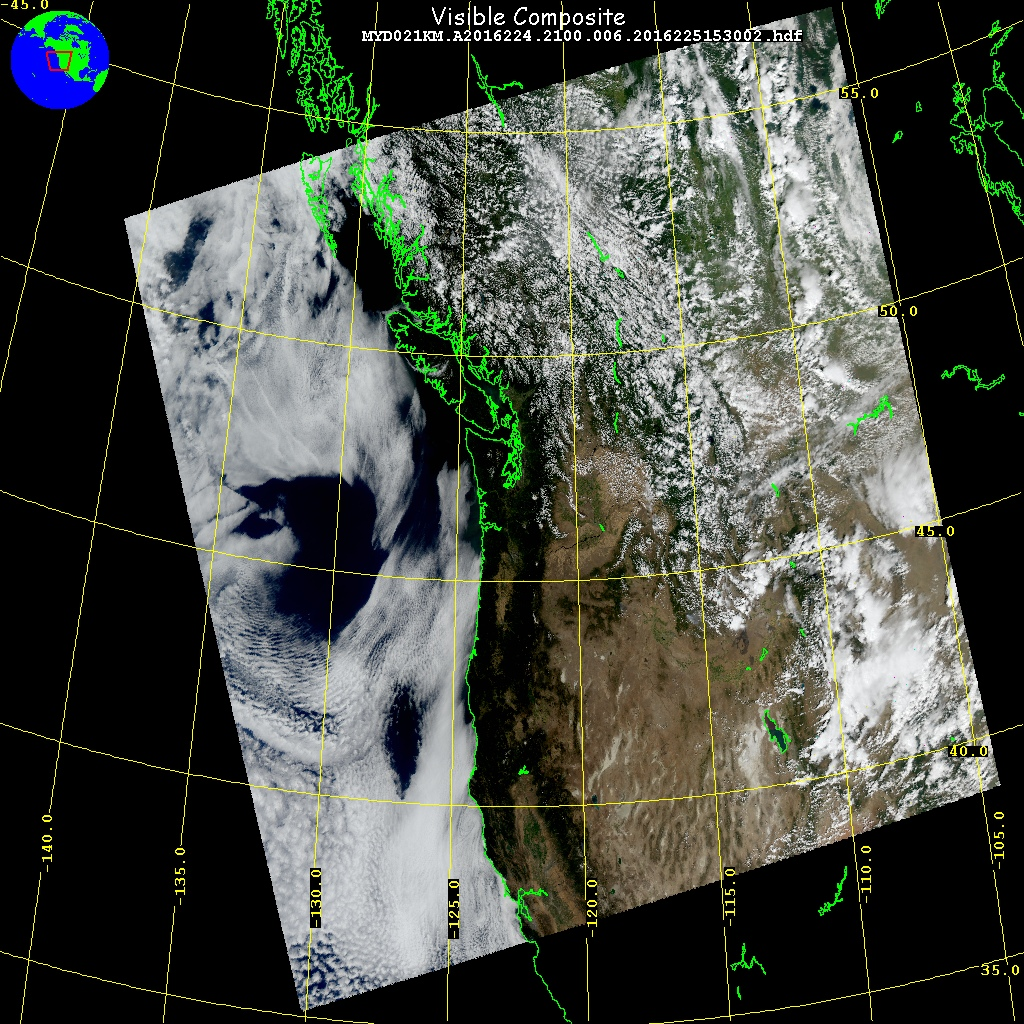

In [2]:
Image('figures/MYBRGB.A2016224.2100.006.2016237025650.jpg')

In [3]:
myd03file="MYD03.A2016224.2100.006.2016225152335.h5"
download(myd03file)


MYD03.A2016224.2100.006.2016225152335.h5 already exists
and is 40795456 bytes
will not overwrite



In [4]:
from e582lib.modis_reproject import modisl1b_resample, write_h5
from e582lib.modis_reproject import make_projectname
chan_list=['31']
result_dict=\
       modisl1b_resample(myd02file,myd03file,chan_list)

index and mean 0 8.396679878234863
running modisl1b_resample: here are the channels to be resampled
channel and mean 31 7.86126708984375
pyresample area_def information:

dump area definition:
Area ID: granule
Name: modis swath 5min granule
Projection ID: laea
Projection: {'datum': 'WGS84', 'lat_0': '46.13', 'lon_0': '-122.60', 'proj': 'laea', 'units': 'm'}
Number of columns: 2222
Number of rows: 1943
Area extent: (-1280423.9837223424, -1189924.0707889115, 1609332.4889824667, 1336446.4037335052)


x and y pixel dimensions in meters:
1300.5204647636406
1300.2421381999056

completed modisl1b_resample


In [5]:
result_dict.keys()

dict_keys(['geotiff_args', 'basemap_args', 'area_def_args', 'channels', 'fill_value'])

In [6]:
chan31=result_dict['channels'][:,:,0]

{'orientation': 'horizontal', 'ticklocation': 'bottom'}


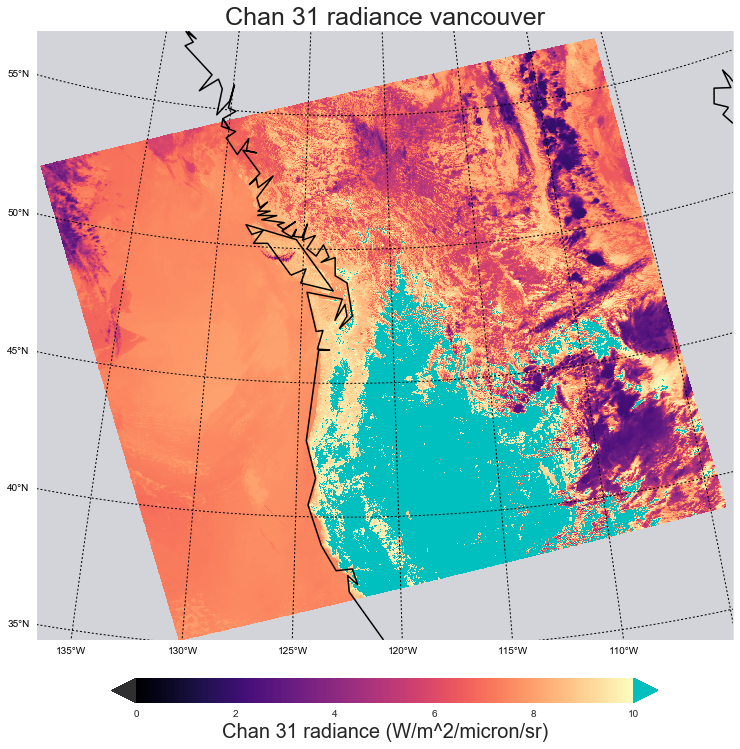

In [7]:
vmin=0
vmax=10.
cmap=cm.get_cmap('magma')
cmap.set_over('c')
cmap.set_under('k',alpha=0.8)
cmap.set_bad('k',alpha=0.1)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)

masked_chan31 = np.ma.masked_invalid(chan31)
fig,ax=plt.subplots(1,1,figsize=(14,14))
basemap_args=result_dict['basemap_args']
basemap_args['ax']=ax
basemap_args['resolution']='c'
bmap=Basemap(**basemap_args)
lat_sep,lon_sep= 5,5
parallels = np.arange(30, 60, lat_sep)
meridians = np.arange(-135, -100, lon_sep)
bmap.drawparallels(parallels, labels=[1, 0, 0, 0],
                       fontsize=10, latmax=90)
bmap.drawmeridians(meridians, labels=[0, 0, 0, 1],
                       fontsize=10, latmax=90)
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='k')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    col = bmap.imshow(masked_chan31,origin='upper', norm=the_norm,cmap=cmap)
    cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    out=fig.colorbar(col,cax=cax,extend='both',**kw)
    out.set_label('Chan 31 radiance (W/m^2/micron/sr)',size=20)
    ax.set_title('Chan 31 radiance vancouver',size=25)
    print(kw)

In [8]:
wavel=11.e-6  #chan 31 central wavelength, meters
chan31_mks = result_dict['channels'][:,:,0]*1.e6  #W/m^2/m/sr
Tbright = planckInvert(wavel,chan31_mks)
Tbright = Tbright - 273.15 #convert to Centigrade


{'orientation': 'horizontal', 'ticklocation': 'bottom'}


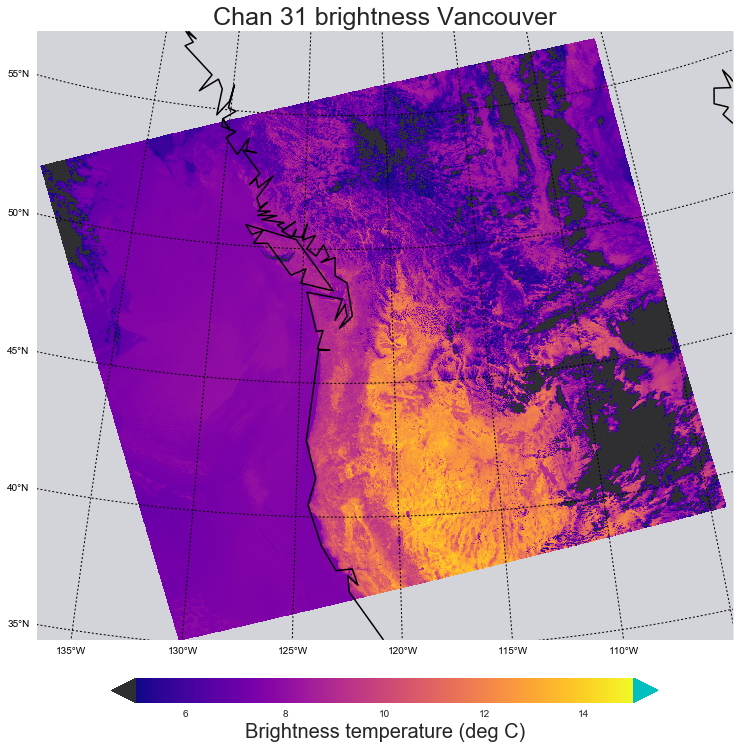

In [10]:
vmin=5
vmax=15
cmap=cm.get_cmap('plasma')
cmap.set_over('c')
cmap.set_under('k',alpha=0.8)
cmap.set_bad('k',alpha=0.1)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)

masked_chan31 = np.ma.masked_invalid(chan31)
fig,ax=plt.subplots(1,1,figsize=(14,14))
basemap_args=result_dict['basemap_args']
basemap_args['ax']=ax
basemap_args['resolution']='c'
bmap=Basemap(**basemap_args)
lat_sep,lon_sep= 5,5
parallels = np.arange(30, 60, lat_sep)
meridians = np.arange(-135, -100, lon_sep)
bmap.drawparallels(parallels, labels=[1, 0, 0, 0],
                       fontsize=10, latmax=90)
bmap.drawmeridians(meridians, labels=[0, 0, 0, 1],
                       fontsize=10, latmax=90)
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='k')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    col = bmap.imshow(masked_chan31,origin='upper', norm=the_norm,cmap=cmap)
    cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    out=fig.colorbar(col,cax=cax,extend='both',**kw)
    out.set_label('Brightness temperature (deg C)',size=20)
    ax.set_title('Chan 31 brightness Vancouver',size=25)
    print(kw)